### Diabetes Project

#### Introduction:-


### What is Diabetes ?
- Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.
- Diabetes raise the risk for damage to the eyes,kidneys and heart.

### Objective of Project:-
- 1.By using given dataset to classify whether someone has diabetes or not.
- 2.In this dataset,there are several Medical Data or information or variables(independent) and 
    one outcome i.e dependent variables.
- 3.The medical information variables are as follow:-
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 
    'DiabetesPedigreeFunction', 'Age'
- 4.The outcome variables are 0 i.e. 'not affected by diabetes' or 1 i.e 'affected by diabetes'.

### Dataset Information:-
- 1.Pregnancies    :- Number of times pregnant.
- 2.Glucose        :- Plasma glucose concentration 2 hours in an oral glucose tolerance test.
- 3.Blood Pressure :- Diastolic blood pressure (mm Hg).
- 4.Skin Thickness :- Triceps skin fold thickness (mm).
- 5.Insulin        :- 2-Hour serum insulin (mu U/ml).
- 6.BMI            :- Body mass index (weight in kg/(height in m)^2).
- 7.Diabetes Pedigree Function:- Scores of diabetes based on family history.
- 8.Age            :- Age in years
- 9.Outcome        :- 0(doesn't have diabetes ) or 1(has diabetes)

In [1]:
# Import all required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load excel file using pandas read_excel() method

df_var = pd.read_excel('E:\JupyterDemo\Datasets\Variables_diabetes_EDA.xlsx')
df_var.T # to read data in transpose form 

,0,1,2,3,4,5,6,7,8
Variables used,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
Unnamed: 1,Number of times pregnant,Plasma glucose concentration 2 hours in an ora...,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1) 0 mean non-diabetic an...


In [3]:
# to load data with columns name

df = pd.read_excel('E:\JupyterDemo\Datasets\diabetes_mandatory_EDA.xlsx',names=df_var['Variables used'])
df.head() # Read fist five row by using head() function

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
# to check number of observation and feature i.e rows and columns
df.shape

(767, 9)

In [5]:
# to read last five row from data frame
df.tail()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# to check type 
type(df)

pandas.core.frame.DataFrame

In [7]:
# to get columns name from data frame
df.columns

Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# to check unique value form each columns

columns = df.columns.to_list()
for col in columns:
    unique_values = df[col].unique()
    numeric = pd.api.types.is_numeric_dtype(df[col])
    print(f'{col} ({df[col].dtype})')
    
    if numeric:
        unique_values = np.sort(unique_values)
    if numeric and (len(unique_values)>20):
        print(unique_values[:10],'.........',unique_values[-10:])
    else:
        print(unique_values)
    print('\n')

Pregnancies (int64)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


Glucose (int64)
[ 0 44 56 57 61 62 65 67 68 71] ......... [189 190 191 193 194 195 196 197 198 199]


Blood Pressure (int64)
[ 0 24 30 38 40 44 46 48 50 52] ......... [ 96  98 100 102 104 106 108 110 114 122]


Skin Thickness (int64)
[ 0  7  8 10 11 12 13 14 15 16] ......... [48 49 50 51 52 54 56 60 63 99]


Insulin (int64)
[ 0 14 15 16 18 22 23 25 29 32] ......... [495 510 540 543 545 579 600 680 744 846]


BMI (float64)
[ 0.  18.2 18.4 19.1 19.3 19.4 19.5 19.6 19.9 20. ] ......... [49.6 49.7 50.  52.3 52.9 53.2 55.  57.3 59.4 67.1]


Diabetes Pedigree Function (float64)
[0.078 0.084 0.085 0.088 0.089 0.092 0.096 0.1   0.101 0.102] ......... [1.6   1.698 1.699 1.731 1.781 1.893 2.137 2.288 2.329 2.42 ]


Age (int64)
[21 22 23 24 25 26 27 28 29 30] ......... [63 64 65 66 67 68 69 70 72 81]


Outcome (int64)
[0 1]




In [9]:
# To check duplicated value present or not
df.duplicated().sum()

0

### Observation :
- There is no any duplicate value

In [10]:
# To check data types of each columns
df.dtypes

Pregnancies                     int64
Glucose                         int64
Blood Pressure                  int64
Skin Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes Pedigree Function    float64
Age                             int64
Outcome                         int64
dtype: object

In [11]:
# to get data types of each columns and check not null values from each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    int64  
 1   Glucose                     767 non-null    int64  
 2   Blood Pressure              767 non-null    int64  
 3   Skin Thickness              767 non-null    int64  
 4   Insulin                     767 non-null    int64  
 5   BMI                         767 non-null    float64
 6   Diabetes Pedigree Function  767 non-null    float64
 7   Age                         767 non-null    int64  
 8   Outcome                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# to get some statitical information of given data sets
df.describe(include='all')

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# rename the column

df = df.rename(columns={'Blood Pressure':'BloodPressure','Skin Thickness':'SkinThickness','Diabetes Pedigree Function':'DiabetesPedigreeFunction'})


In [14]:
# check column name after rename
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Observation on statistical table:-
- Here, we get statistical information by describe() method.
- some of the columns are given zero(0) as miminum value,so it's not possible medically.
- so we perform data cleaning process.
- we'll replace them by mean/median value depends on distribution.
- also seen that max value of Insulin level is 846! i.e  outliers.

In [15]:
# Missing Values

df.isnull().sum()

# there is no any missing value in given data set


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# checking for 0 values in 
print('The number of zero values in Glucose :- ',df[df['Glucose']==0].shape[0])
print('The number of zero values in Blood Pressure :- ',df[df['BloodPressure']==0].shape[0])
print('The number of zero values in Skin Thickness :- ',df[df['SkinThickness']==0].shape[0])
print('The number of zero values in Insulin :- ',df[df['Insulin']==0].shape[0])
print('The number of zero values in BMI :- ',df[df['BMI']==0].shape[0])

The number of zero values in Glucose :-  5
The number of zero values in Blood Pressure :-  35
The number of zero values in Skin Thickness :-  227
The number of zero values in Insulin :-  373
The number of zero values in BMI :-  11


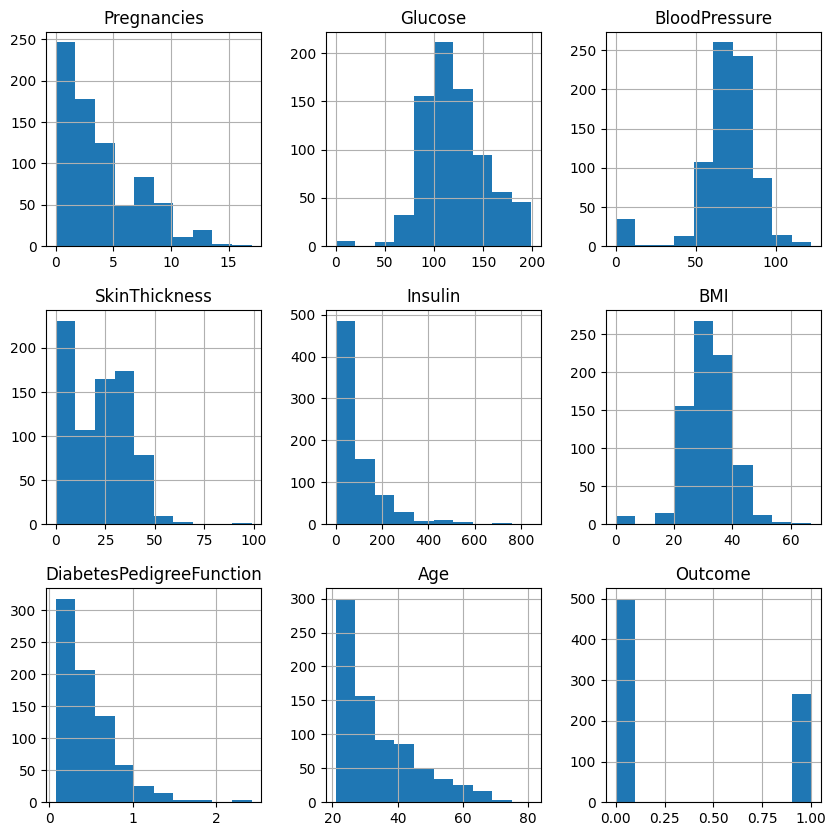

In [17]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [18]:
# check skewed data
round(df.skew(),2)

Pregnancies                 0.90
Glucose                     0.18
BloodPressure              -1.84
SkinThickness               0.11
Insulin                     2.27
BMI                        -0.43
DiabetesPedigreeFunction    1.92
Age                         1.14
Outcome                     0.64
dtype: float64

In [19]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

### Outliers:-
- An outlier is an observation of data point that lies an abnormal distance from other values in a given population.

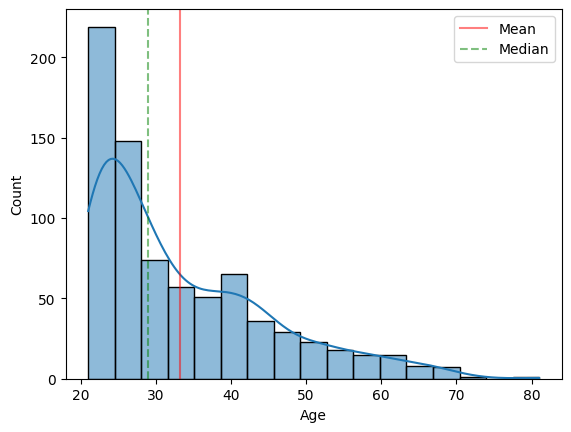

In [20]:
### Finding Outliers
### Draw Histrogram
sns.histplot(data=df,x='Age',kde=True)
plt.axvline(x=df.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=df.Age.median(),color='green',ls='--',alpha=0.5,label='Median')
plt.legend()

## Observation:-
- Above Age column Histrogram suggest that it's Right Skewed Data because of mean is grather than median.

In [21]:
def Outlier_chart(df,*var):
    for i in var:
        plt.figure(figsize=(7,6))
        plt.title(f'Outlier in {i}',fontsize=15)
        sns.boxplot(data=df,x=i)
        plt.show()
        print()
        
        q1,q3 = np.percentile(df[i],(25,75))
        IQR = q3-q1
        up_lm = q3+1.5*IQR
        low_lm = q1-1.5*IQR
        out_data = df[(df[i]<low_lm) | (df[i]>up_lm)]
        print(f'Outlier Data of {i}:-',out_data[i],'\n')
        print(f'Outlier in {i}',round(out_data.shape[0]/df.shape[0]*100,2),'%')
        print()

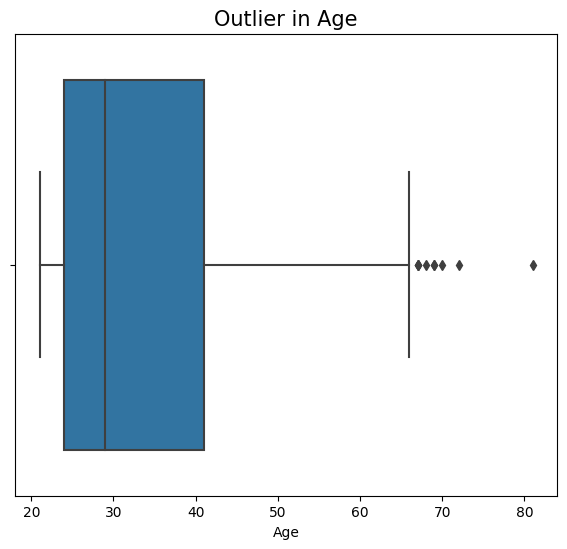


Outlier Data of Age:- 122    69
362    67
452    72
458    81
488    67
536    67
665    70
673    68
683    69
Name: Age, dtype: int64 

Outlier in Age 1.17 %



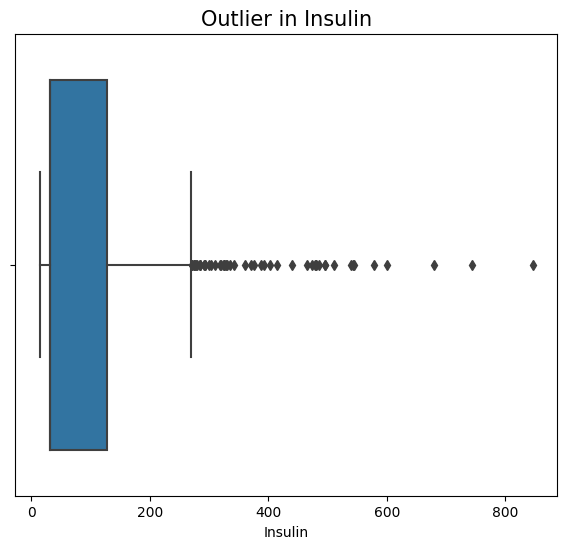


Outlier Data of Insulin:- 7      543
12     846
52     300
53     342
55     304
110    495
138    325
143    284
152    485
161    285
185    495
198    318
205    280
214    271
219    478
227    744
230    370
246    680
247    402
257    375
278    278
285    545
295    360
359    325
363    293
369    465
374    325
387    285
391    415
394    275
408    579
411    310
414    474
424    277
479    328
485    480
518    326
560    274
573    330
583    600
605    293
607    272
611    321
644    440
654    540
694    480
706    335
709    387
712    291
714    392
752    510
Name: Insulin, dtype: int64 

Outlier in Insulin 6.65 %



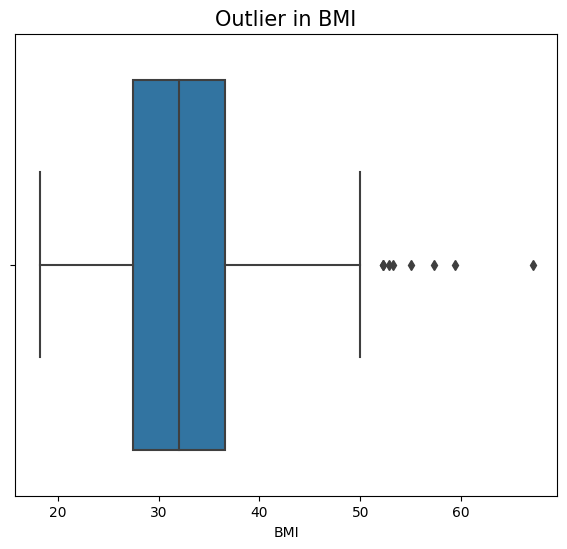


Outlier Data of BMI:- 119    53.2
124    55.0
176    67.1
192    52.3
246    52.3
302    52.9
444    59.4
672    57.3
Name: BMI, dtype: float64 

Outlier in BMI 1.04 %



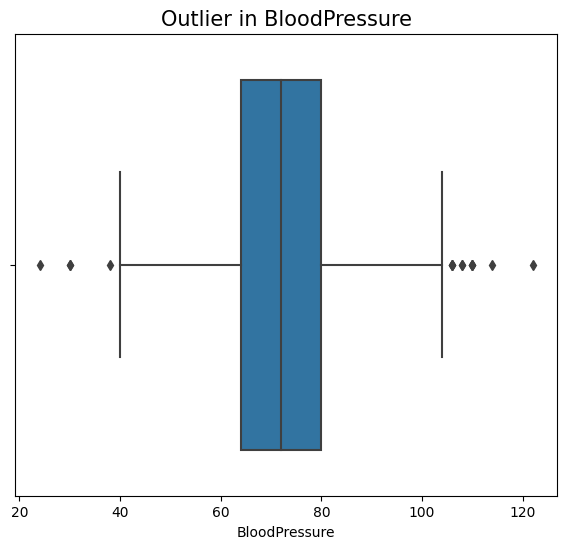


Outlier Data of BloodPressure:- 17      30.0
42     110.0
83     108.0
105    122.0
124     30.0
176    110.0
361    108.0
548    110.0
596     24.0
598     38.0
657    106.0
661    106.0
671    106.0
690    114.0
Name: BloodPressure, dtype: float64 

Outlier in BloodPressure 1.83 %



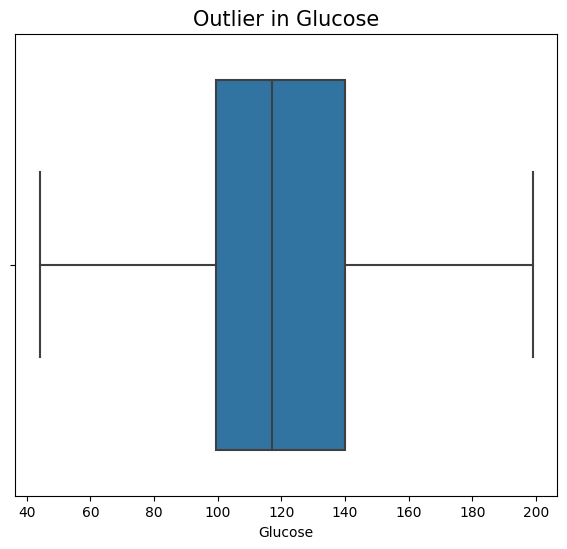


Outlier Data of Glucose:- Series([], Name: Glucose, dtype: float64) 

Outlier in Glucose 0.0 %



In [22]:
#df.dtypes
Outlier_chart(df,'Age','Insulin','BMI','BloodPressure','Glucose')

### Distribution of Numerical Values by Histogram

In [23]:
def num_dis(df,*var):
    for i in var:
        plt.figure(figsize=(6,5))
        plt.title(f'Distribution of {i} ',fontsize=15)
        sns.histplot(data=df,x=i,color='green',kde=True)
        plt.axvline(x=df[i].mean(),color='red',alpha=0.5,label='Mean')
        plt.axvline(x=df[i].median(),color='blue',ls='--',alpha=0.5,label='Median')
        plt.legend()
        print()

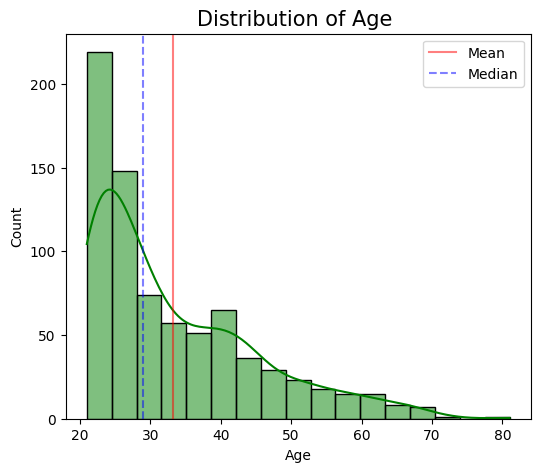

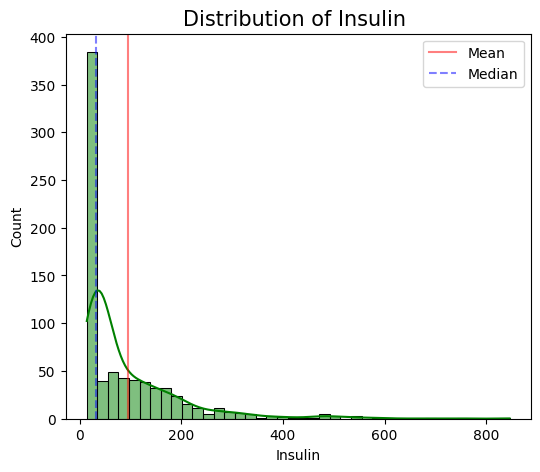

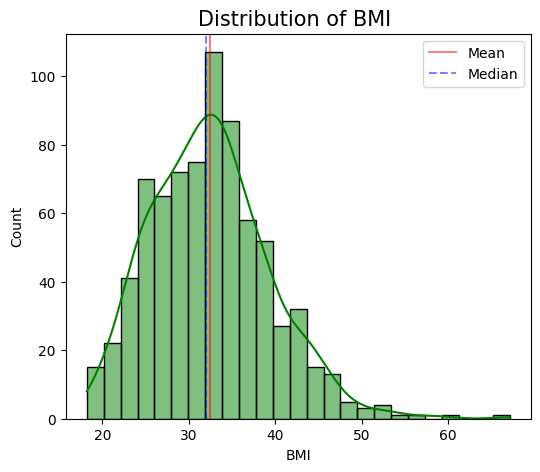

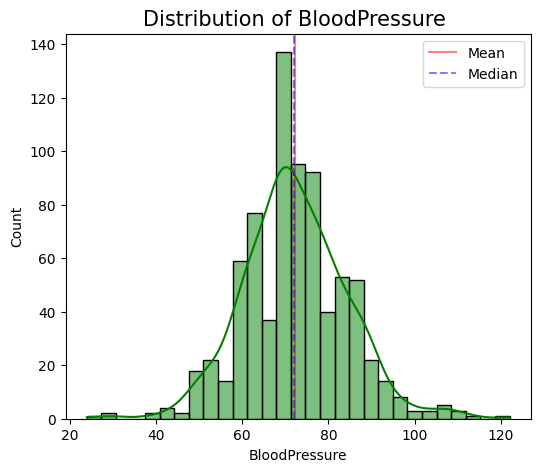

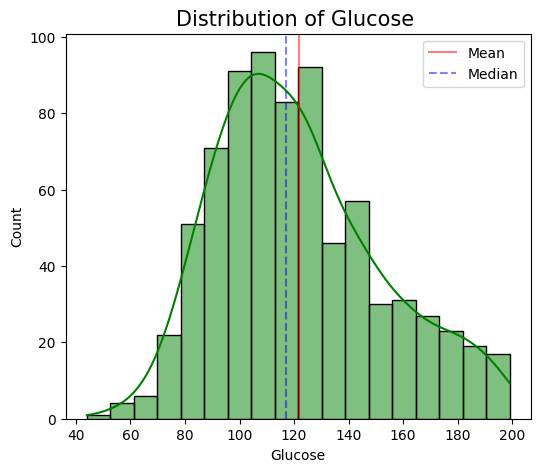

In [24]:
num_dis(df,'Age','Insulin','BMI','BloodPressure','Glucose')

In [25]:
#pair plot
#sns.pairplot(df)

<AxesSubplot: xlabel='Age', ylabel='BMI'>

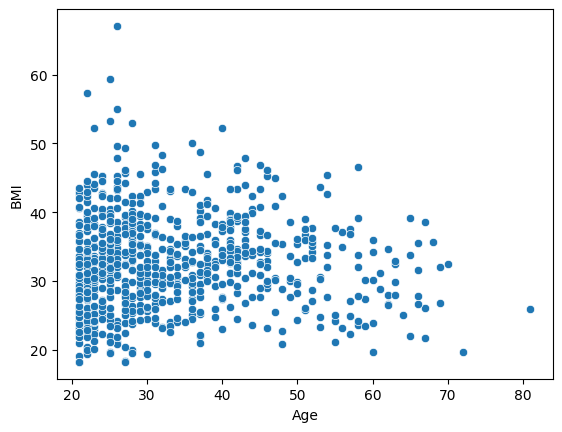

In [26]:
#scaatter plot
sns.scatterplot(data=df,
               x='Age',
               y='BMI'
               )

In [27]:
# Feature Selection
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127340,0.209057,0.031898,-0.054241,0.021413,-0.033927,0.544018,0.221087
Glucose,0.127340,1.000000,0.219801,0.171582,0.359307,0.231397,0.136666,0.265476,0.492206
BloodPressure,0.209057,0.219801,1.000000,0.152555,-0.021187,0.281242,0.000388,0.327215,0.163219
SkinThickness,0.031898,0.171582,0.152555,1.000000,0.238602,0.547027,0.142554,0.053063,0.187899
Insulin,-0.054241,0.359307,-0.021187,0.238602,1.000000,0.189339,0.178028,-0.012863,0.150669
BMI,0.021413,0.231397,0.281242,0.547027,0.189339,1.000000,0.153429,0.025468,0.312337
DiabetesPedigreeFunction,-0.033927,0.136666,0.000388,0.142554,0.178028,0.153429,1.000000,0.032738,0.173245
Age,0.544018,0.265476,0.327215,0.053063,-0.012863,0.025468,0.032738,1.000000,0.236417
Outcome,0.221087,0.492206,0.163219,0.187899,0.150669,0.312337,0.173245,0.236417,1.000000


<AxesSubplot: >

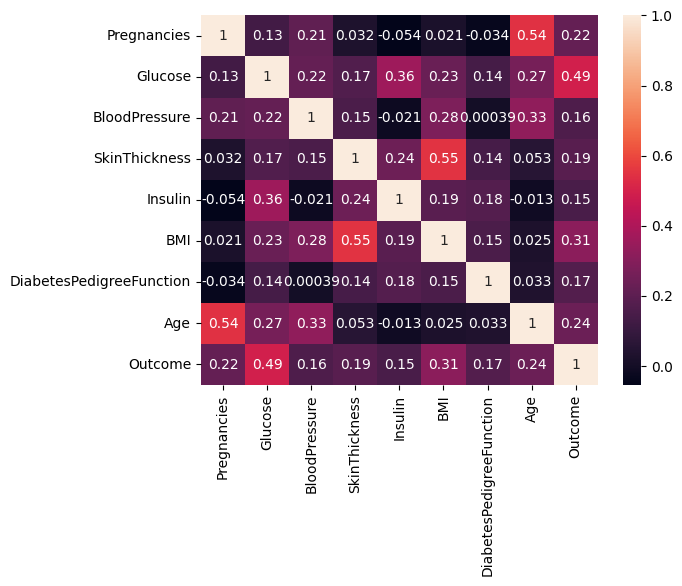

In [28]:
#Draw HeatMap
sns.heatmap(df_corr,annot=True)

In [30]:
df_selected = df.drop(columns=['BloodPressure','SkinThickness','DiabetesPedigreeFunction'],axis=1)
#df_selected

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,1,85.0,32,26.6,31,0
1,8,183.0,32,23.3,32,1
2,1,89.0,94,28.1,21,0
3,0,137.0,168,43.1,33,1
4,5,116.0,32,25.6,30,0
...,...,...,...,...,...,...
762,10,101.0,180,32.9,63,0
763,2,122.0,32,36.8,27,0
764,5,121.0,112,26.2,30,0
765,1,126.0,32,30.1,47,1


## Handling Outliers
### Quantile Transformer:-
- This techique is used to reduse outiler as well as transforms the features to follow normal distribution.

In [32]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

E:\JupyterDemo\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (767). n_quantiles is set to n_samples.
  warnings.warn(
E:\JupyterDemo\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.232376,0.091384,0.256527,0.213446,0.559399,0.0
1,0.863577,0.956919,0.256527,0.077676,0.585509,1.0
2,0.232376,0.124674,0.662533,0.284595,0.000000,0.0
3,0.000000,0.721932,0.834204,0.926893,0.607050,1.0
4,0.678851,0.484334,0.256527,0.171671,0.529373,0.0


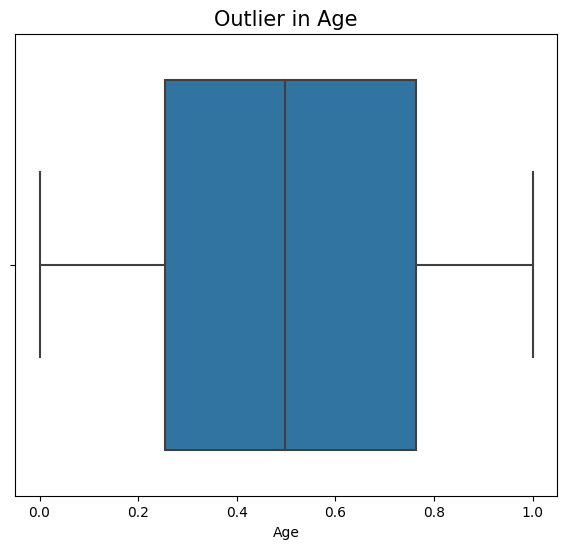


Outlier Data of Age:- Series([], Name: Age, dtype: float64) 

Outlier in Age 0.0 %



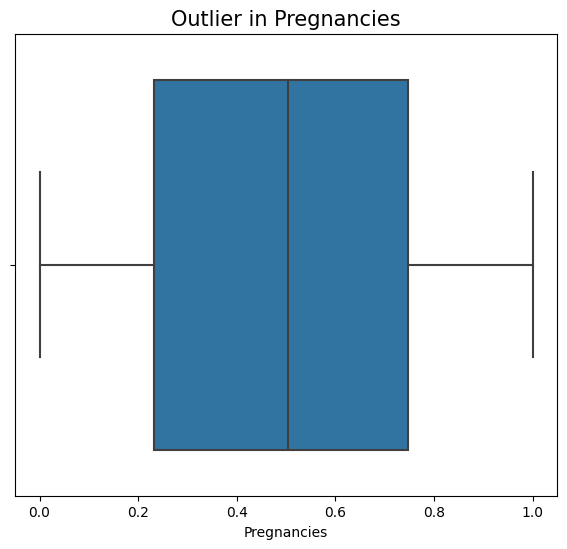


Outlier Data of Pregnancies:- Series([], Name: Pregnancies, dtype: float64) 

Outlier in Pregnancies 0.0 %



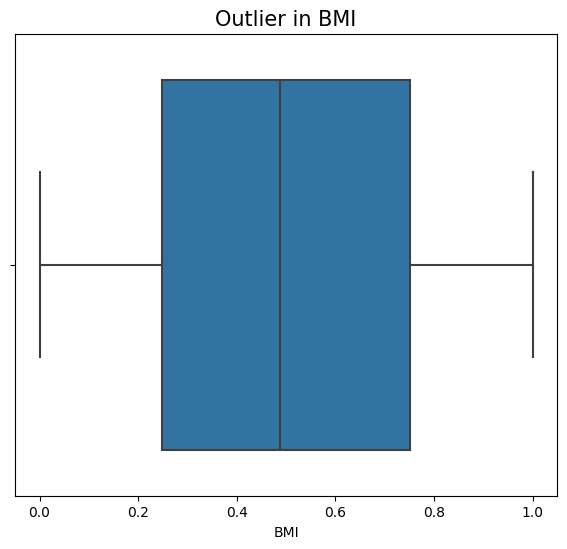


Outlier Data of BMI:- Series([], Name: BMI, dtype: float64) 

Outlier in BMI 0.0 %



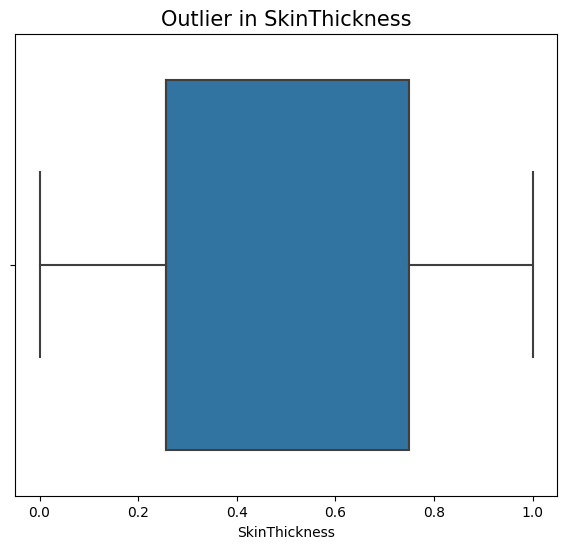


Outlier Data of SkinThickness:- Series([], Name: SkinThickness, dtype: float64) 

Outlier in SkinThickness 0.0 %



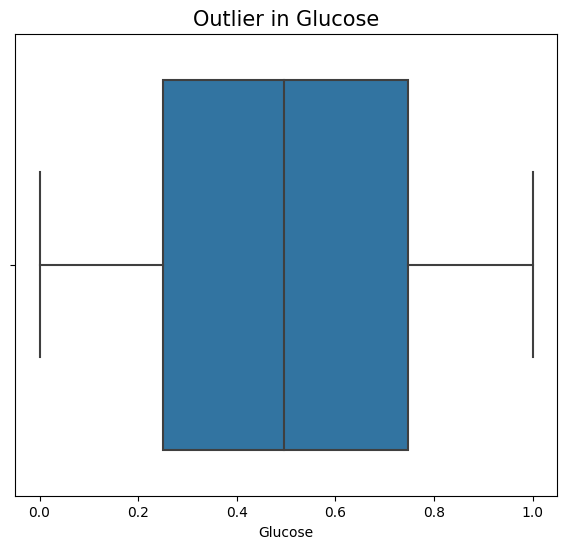


Outlier Data of Glucose:- Series([], Name: Glucose, dtype: float64) 

Outlier in Glucose 0.0 %



In [34]:
Outlier_chart(df_new,'Age','Pregnancies','BMI','SkinThickness','Glucose')

In [35]:
### Split the Data Frame into X and y
target_name = 'Outcome'
y = df_new[target_name]# for predictions - training data
X = df_new.drop(target_name,axis=1)# dropping Outcome column

In [43]:
X.head() # containing independent features
#X.shape

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.232376,0.091384,0.256527,0.213446,0.559399
1,0.863577,0.956919,0.256527,0.077676,0.585509
2,0.232376,0.124674,0.662533,0.284595,0.000000
3,0.000000,0.721932,0.834204,0.926893,0.607050
4,0.678851,0.484334,0.256527,0.171671,0.529373


In [44]:
y.head() # containing dependent feature

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Outcome, dtype: float64

### Train and Test Split
- Train-Test split technique is used for evaluting performance of a machine learning algorithm.
- Train Dataset:-Used to fit the machine learning model.
- Test Dataset:- Used to evaluate the fit machine learning model.
- Common split percentages as below:-
    - Train: 80%, Test:20%
    - Train: 67%, Test:33%
    - Train: 50%, Test:50%

#### I am hear used 80% Train and 20% Test.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [48]:
X_train.shape,y_train.shape

((613, 5), (613,))

In [49]:
X_test.shape,y_test.shape

((154, 5), (154,))

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\JupyterDemo\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\JupyterDemo\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "E:\JupyterDemo\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "E:\JupyterDemo\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback 